# Data Analysis

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the data

In [153]:
aggregate = pd.read_csv('./data/clean/aggregate.csv')
firm_data = pd.read_csv('./data/clean/firm_data.csv')

In [154]:
# Create share variables
df = firm_data.copy()

df['firms_share'] = df['firms'] / df.groupby('year')['firms'].transform('sum')
df['estabs_share'] = df['estabs'] / df.groupby('year')['estabs'].transform('sum')
df['emp_share'] = df['emp'] / df.groupby('year')['emp'].transform('sum')

firm_data = df.copy()

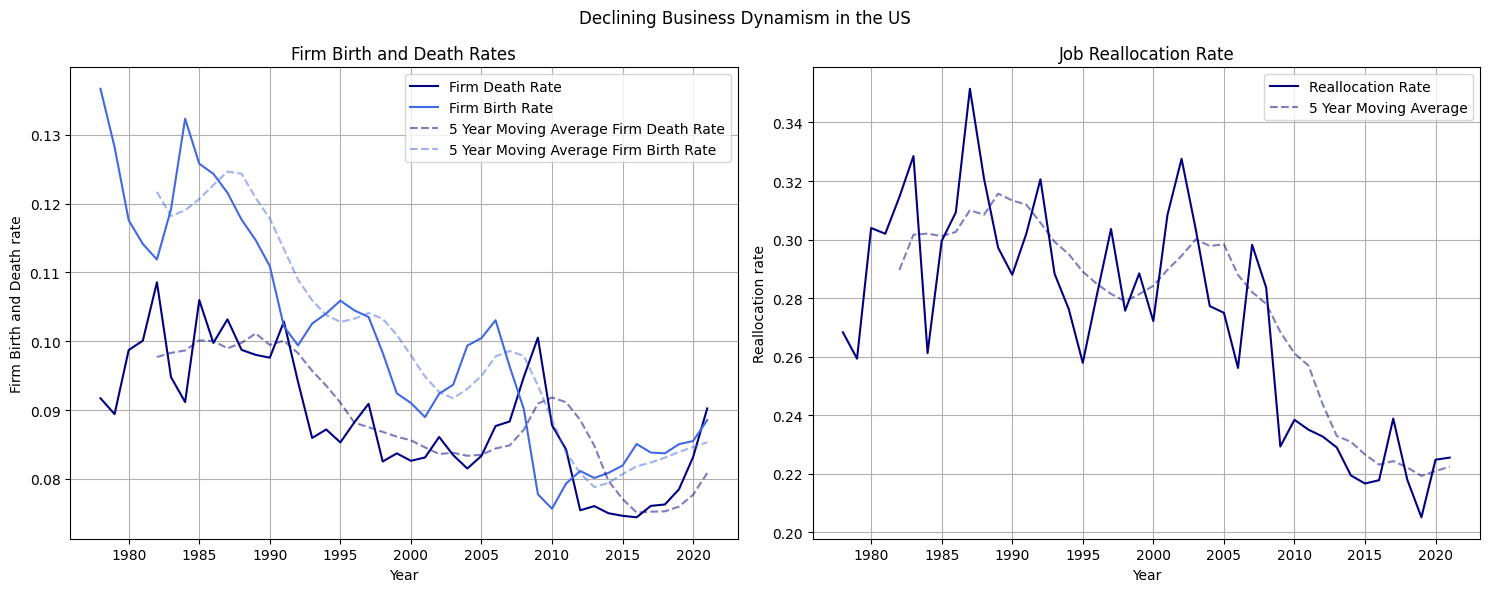

In [155]:
aggregate['year'] = pd.to_datetime(aggregate['year'], format='%Y')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Declining Business Dynamism in the US')

ax1.set_title('Firm Birth and Death Rates')
ax1.set_xlabel('Year')
ax1.set_ylabel('Firm Birth and Death rate')

ax1.plot(aggregate['year'], aggregate['firmdeath_rate'], label='Firm Death Rate', color='navy')
ax1.plot(aggregate['year'], aggregate['firmbirth_rate'], label='Firm Birth Rate', color='royalblue')

ax1.plot(aggregate['year'], aggregate['firmdeath_rate'].rolling(window=5).mean(),
        label='5 Year Moving Average Firm Death Rate',
        color='navy', linestyle='--', alpha=0.51)

ax1.plot(aggregate['year'], aggregate['firmbirth_rate'].rolling(window=5).mean(),
        label='5 Year Moving Average Firm Birth Rate',
        color='royalblue', linestyle='--', alpha=0.5)

ax1.grid()
ax1.legend()

ax2.set_title('Job Reallocation Rate')
ax2.set_xlabel('Year')
ax2.set_ylabel('Reallocation rate')

ax2.plot(aggregate['year'], aggregate['reallocation_rate']/100, label='Reallocation Rate', color='navy')
ax2.plot(aggregate['year'], (aggregate['reallocation_rate']/100).rolling(window=5).mean(),
         label='5 Year Moving Average',
         color='navy', linestyle='--', alpha=0.5)

ax2.grid()
ax2.legend()

fig.set_tight_layout(True)

fig.savefig('./images/declining_business_dynamism.png')

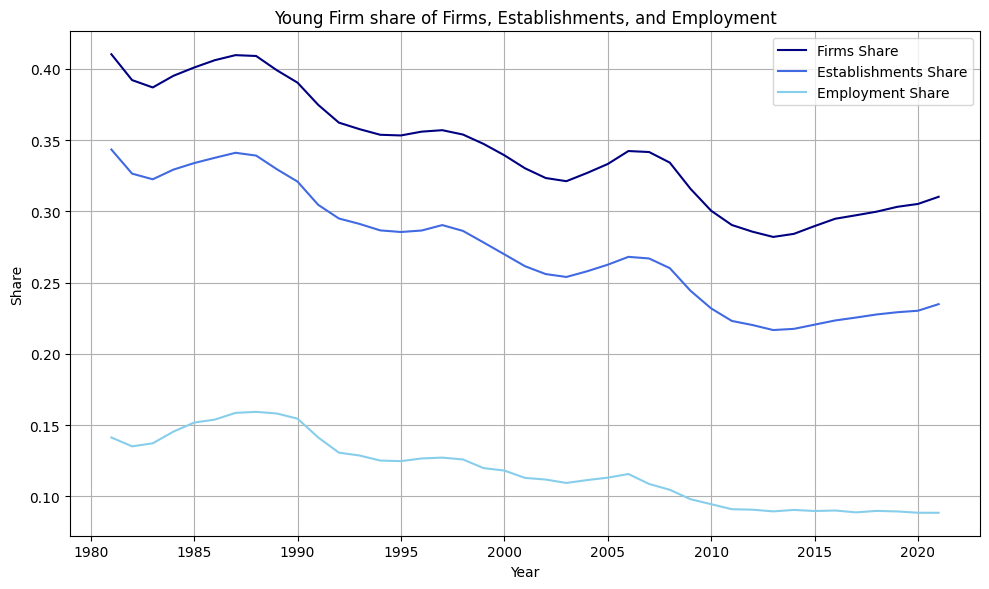

In [156]:
df = firm_data[(firm_data['year'] > 1980) & (firm_data['fage'].isin(['0', '1', '2', '3', '4']))].copy()
df = df.groupby('year')[['firms_share', 'estabs_share', 'emp_share']].sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Young Firm share of Firms, Establishments, and Employment')
ax.set_xlabel('Year')
ax.set_ylabel('Share')

ax.plot(df.index, df['firms_share'], label='Firms Share', color='navy')
ax.plot(df.index, df['estabs_share'], label='Establishments Share', color='royalblue')
ax.plot(df.index, df['emp_share'], label='Employment Share', color='skyblue')

ax.grid()
ax.legend()

fig.set_tight_layout(True)

fig.savefig('./images/young_firm_share.png')

## R&D spending

In [ ]:
patent_rnd = pd.read_csv('./data/clean/real_rnd_patents.csv')



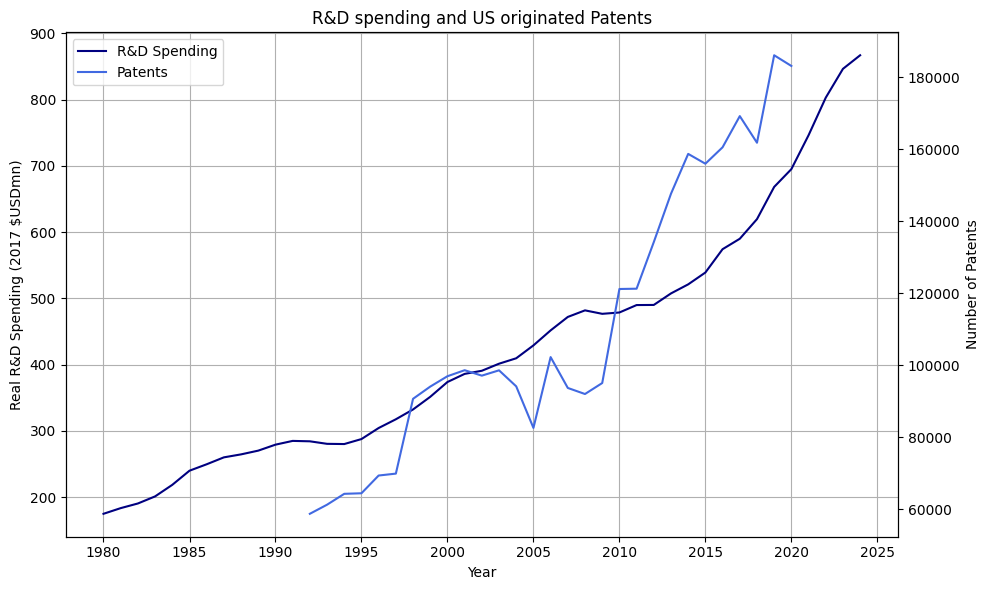

In [ ]:
patent_rnd['year'] = pd.to_datetime(patent_rnd['year'])

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot R&D spending on left axis
color1 = 'navy'
ax1.set_xlabel('Year')
ax1.set_ylabel('Real R&D Spending (2017 $USDmn)')
ax1.plot(patent_rnd['year'], patent_rnd['rnd'], color=color1, label='R&D Spending')
ax1.tick_params(axis='y')

# Create second y-axis for patents
ax2 = ax1.twinx()
color2 = 'royalblue'
ax2.set_ylabel('Number of Patents')
ax2.plot(patent_rnd['year'], patent_rnd['patents'], color=color2, label='Patents')
ax2.tick_params(axis='y')

# Add title and adjust layout
plt.title('R&D spending and US originated Patents')
fig.tight_layout()

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.grid()

fig.savefig('./images/patents_rnd.png')